In [19]:
import pandas as pd
import datetime
import dateutil.parser

In [20]:
path = '/Users/casy/Dropbox/CUSP/GRA/QC_GRA/CUSP_QC_twitter_scripts/code/Networks/data/2016_02_18_sintetic.csv'

# datetime parsing

In [21]:
data = pd.read_csv(path,index_col=0) 
data['ts'] = pd.to_datetime(data.timestamp, unit='s') - datetime.timedelta(hours=5) ## UTS - 5h NYC

# workday / weekday subset
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DatetimeIndex.weekday.html

In [26]:
wd = data[data['ts'].dt.weekday < 5]  # workday
st = data[data['ts'].dt.weekday == 5] # Saturday
sd = data[data['ts'].dt.weekday == 6] # Sunday

# save/load to /from hdf -- much faster for large files

In [ ]:
# wd.to_hdf(path2, 'wd')
# wd = pd.read_hdf(path2)

# map plot
I know that Stan dont use geopandas for some reason. However, I think it is super useful for our purposes

generally geopandas mixes GIS with pandas, so each row represents a geometry, and .plot() will plot the geometry (map) using matplotlib. with gdf.plot(column=col, cmap='spectral'), where col - numerical or categorical column, we can plot nice choroplets on the fly. It also reads shape files easily

In [39]:
import geopandas as gp
import os

%pylab inline
import matplotlib.pyplot as plt


Populating the interactive namespace from numpy and matplotlib


In [40]:
# zipcode maps
zipPath = os.getenv('PWD') + '/data/misk/nyc-zip-code-tabulation-areas-polygons.geojson'
zips = gp.read_file(zipPath)
zips.head(2)

,@id,BLDGpostalCode,CTY_FIPS,OBJECTID,PO_NAME,STATE,ST_FIPS,Shape_Area,Shape_Leng,borough,geometry,postalCode
0,http://nyc.pediacities.com/Resource/PostalCode...,0,081,1,Jackson Heights,NY,36,20163283.8744,20624.692317,Queens,POLYGON ((-73.86942457284175 40.74915687096787...,11372
1,http://nyc.pediacities.com/Resource/PostalCode...,0,081,2,Glen Oaks,NY,36,22606526.9139,23002.816039,Queens,POLYGON ((-73.71068374074007 40.75004039450917...,11004


In [41]:
# labelZip = zips.merge(labels, how='left', on='postalCode')  # 

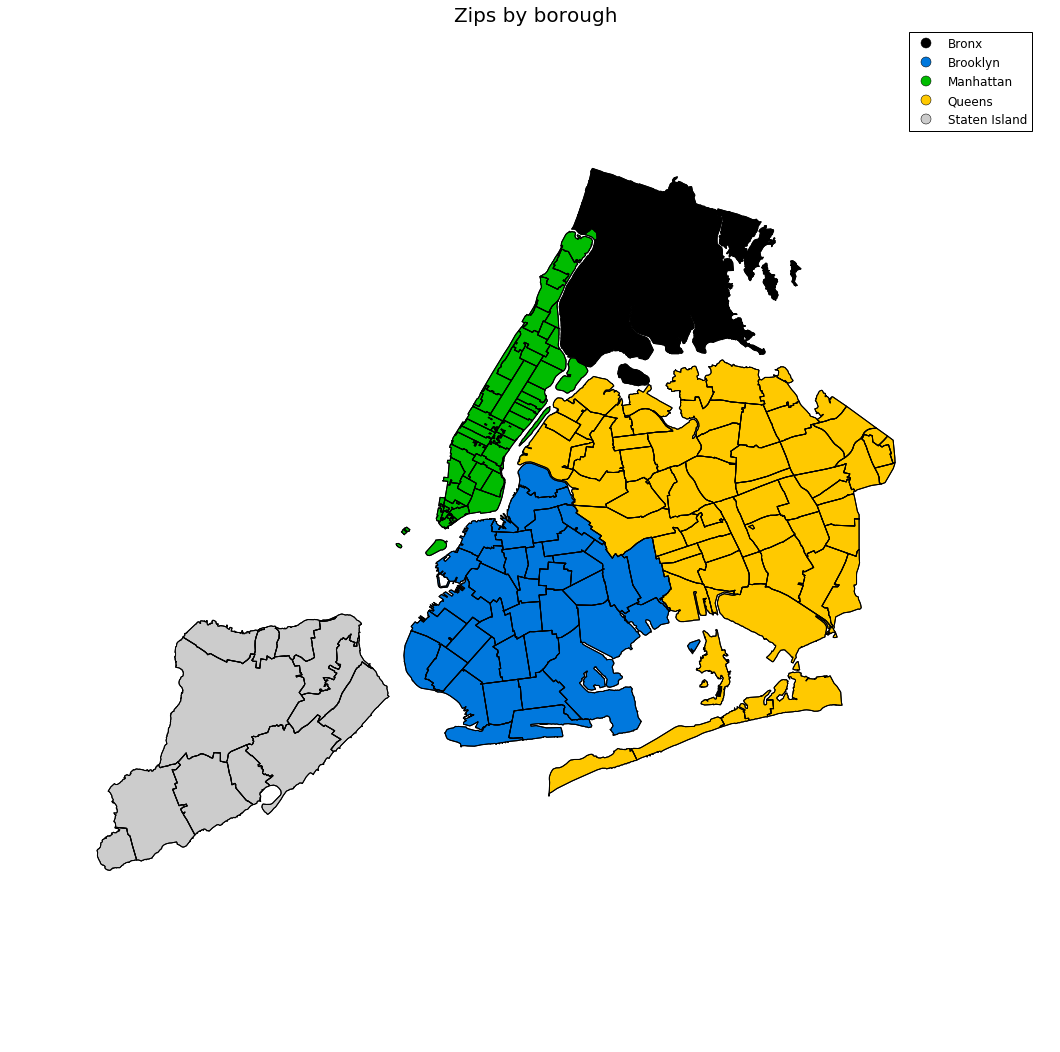

In [46]:
fig, ax = plt.subplots(figsize=(18,18))

zips.plot(alpha=0, ax=ax) # empty back, I plot so that we can see 
                          #which geometry has null parameter column
    
    
zips[pd.notnull(zips.borough)].plot(column='borough', categorical=1,
           colormap='spectral', ax=ax, 
           alpha=1, legend=True)

plt.title('Zips by borough', fontsize=20)
plt.axis('off');

and last one - just in order to keep code clean and reduce number of unneccesary variables, I hightly recommend to wrap as much code into functions, as you can - moreover, then functuins can be saved into separate .py file, so you can import them to the ipython.

In [1]:
def plotChoroplet(data, column, ax=None):
    
    if not ax: # thus, it also can settle the specific axis in the multyplot
        fig, ax = plt.subplots(figsize=(18,18))

    data.plot(alpha=0, ax=ax) # empty back, I plot so that we can see 
                              #which geometry has null parameter column
    
    
    dara[pd.notnull(data[column])].plot(column=column, 
               colormap='spectral', ax=ax, legend=True)

    ax.set_title('Zips by borough', fontsize=20)
    plt.axis('off'); # remove xy axes

In [3]:
from plots import plotChoroplet  # if you save function above into the plots.py file